In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.ndimage import gaussian_filter
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Latin Modern Roman"],  # must be installed on your system
    "mathtext.fontset": "cm",             # Computer Modern math, matches LaTeX style
    "text.usetex": True                    # render text via LaTeX
})

In [12]:
# # Valencia2 W1 p:
# file_path_topography = r"../Data/AFM/Valencia_2_W1/100x10_p_topography.txt"
# file_path_current = r"../Data/AFM/Valencia_2_W1/100x10_p_current.txt"
# Ni2Si Stückchen 850 °C:
# file_path_topography = r"../Data/AFM/NiSi_Stückchen/Ni2Si_850_topography.txt"
# file_path_current = r"../Data/AFM/NiSi_Stückchen/Ni2Si_850_current.txt"
file_path_topography = r"../Data/AFM/NiSi_Stückchen/Ni2Si_1000_1V_topography.txt"
file_path_current = r"../Data/AFM/NiSi_Stückchen/Ni2Si_1000_1V_current.txt"
# Ni cTLM:
# file_path_topography = r"../Data/AFM/2026-01-16_cTLM_01/relevant/20251216_Strucktur_7-1_TLM_15um_200mV_Topography.txt"
# file_path_current = r"../Data/AFM/2026-01-16_cTLM_01/relevant/20251216_Strucktur_7-1_TLM_15um_200mV_Retrace_Current.txt"

topography_array = np.loadtxt(file_path_topography, delimiter=None)
current_array = np.loadtxt(file_path_current, delimiter=None)
current_array = current_array + 0.53
current_array = current_array * (-1)

In [3]:
physical_width = 5   # x in µm
physical_height = 5  # y in µm
# physical_width = 40   # x in µm
# physical_height = 40  # y in µm
# physical_width = 30   # x in µm
# physical_height = 20  # y in µm

ny, nx = topography_array.shape

x_1d = np.linspace(0, physical_width, nx)
y_1d = np.linspace(physical_height, 0, ny) 

X, Y = np.meshgrid(x_1d, y_1d)

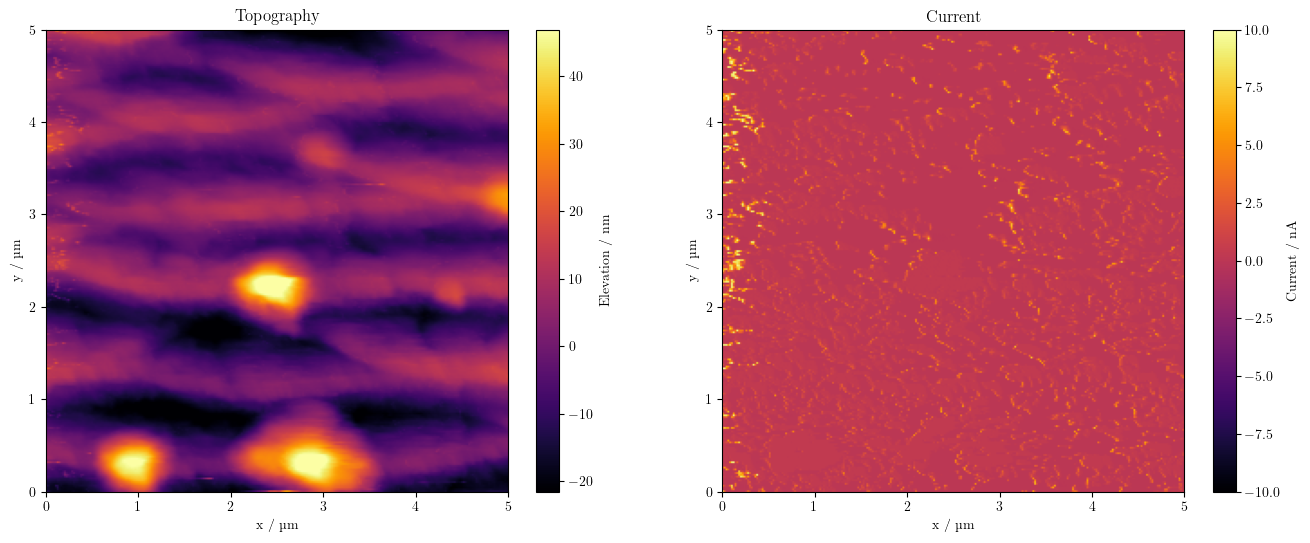

In [13]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
# remove top 1% from colorbar for better contrast
vmax = np.percentile(topography_array, 99.5)   # ignore top 0,5%
vmin = np.percentile(topography_array, 1)    # optiopAl

topography = ax1.imshow(topography_array, cmap='inferno', extent=[0, physical_width, 0, physical_height], vmin=vmin, vmax=vmax)
cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pAd=0.05
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")


ax2 = fig.add_subplot(1,2,2)
current = ax2.imshow(current_array, cmap='inferno', extent=[0, physical_width, 0, physical_height], vmax=10, vmin=-10)  # plasma inferno Spectral viridis magma
cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
cbar2.set_label('Current / nA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()
# plt.savefig('../Images/Valencia_p_Struktur_5-3.pdf', dpi=1000)

### adjusting the colormap scale to match the colorbar on topograpy and current

In [91]:
x_min, x_max = 0, 40
y_min, y_max = 0, 27

# boolean mask using the meshgrid
mask = (X >= x_min) & (X <= x_max) & (Y >= y_min) & (Y <= y_max)
# apply mask to the data (just using 2D_array[mask] creates flattend list => use row + column filter)
rows = np.any(mask, axis=1)
cols = np.any(mask, axis=0)
topography_contact = topography_array[np.ix_(rows, cols)]
current_contact = current_array[np.ix_(rows, cols)]

In [92]:
print(np.min(topography_array), np.max(topography_array))

-66.50403754591844 158.8270497736089


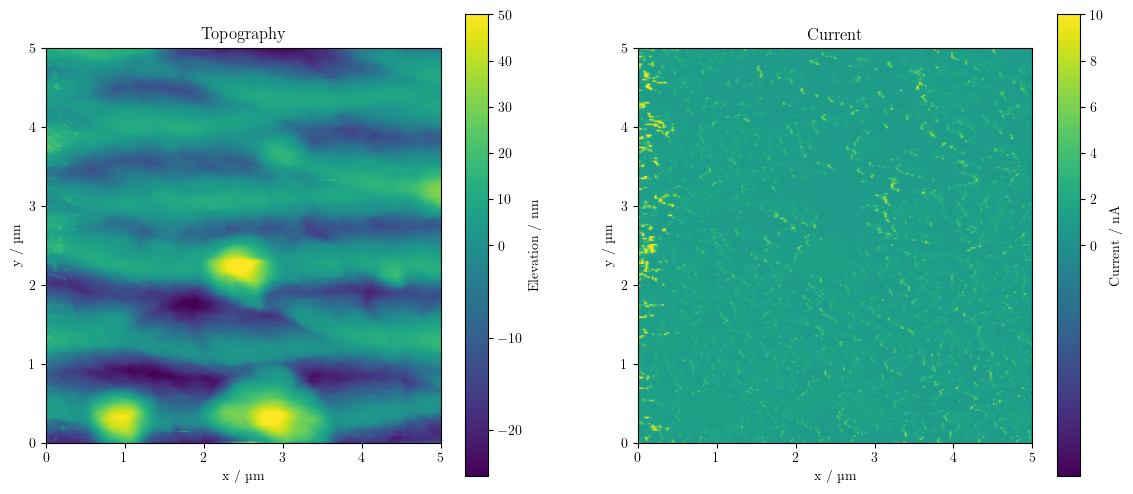

In [11]:
# norm_topo = mcolors.TwoSlopeNorm(vmin=-70, vcenter=0, vmax=100)
# norm_curr = mcolors.TwoSlopeNorm(vmin=-0.1, vcenter=0, vmax=10)
# norm_topo = mcolors.TwoSlopeNorm(vmin=-45, vcenter=0, vmax=45)
# norm_curr = mcolors.TwoSlopeNorm(vmin=-0.1, vcenter=0, vmax=10)
norm_topo = mcolors.TwoSlopeNorm(vmin=-25, vcenter=0, vmax=50)
norm_curr = mcolors.TwoSlopeNorm(vmin=-0.1, vcenter=0, vmax=10)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Topography Plot   topography_contact topography_array
im1 = ax1.imshow(topography_array, cmap='viridis', norm=norm_topo, extent=[0, physical_width, 0, physical_height])    # [0, physical_width, 0, physical_height]

cbar1 = plt.colorbar(im1, ax=ax1, label='Elevation (nm)')
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")

# Current Plot  current_contact current_array
im2 = ax2.imshow(current_array, cmap='viridis', norm=norm_curr, extent=[0, physical_width, 0, physical_height])   # viridis inferno            [x_min, x_max, y_min, y_max]
# im2 = ax2.imshow(current_contact, cmap='viridis', extent=[x_min, x_max, y_min, y_max], vmax=10, vmin=0)   # viridis inferno

cbar2 = plt.colorbar(im2, ax=ax2, label='Current (pA)')
cbar2.set_label('Current / nA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")

from matplotlib.ticker import MultipleLocator
# ax1.yaxis.set_major_locator(MultipleLocator(5))
# ax2.yaxis.set_major_locator(MultipleLocator(5))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(MultipleLocator(1))

# plt.savefig('../Images/AFM/Ni2Si_850.pdf', dpi=500)
# plt.savefig('../Images/AFM/Valencia2_W1_p.pdf', dpi=500)
# plt.savefig('../Images/AFM/Ni_cTLM_2.pdf', dpi=500)
plt.show()